In [2]:
import zipfile
with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip","r") as zip_ref:
    zip_ref.extractall("house_prices")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("house_prices/train.csv")
test = pd.read_csv("house_prices/test.csv")

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

alley has only 91 entries , we can consider dropping it but it might hvae high correlation
masvenr has 560 entries so we will check if it has high correlation
if yes then we will fill out those valeus 
MiscFeature has very low entries
PoolQc also has very low entries but it might have good correlation hence we will check that

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

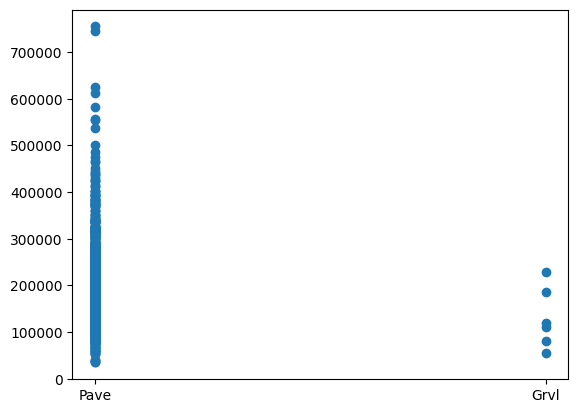

In [7]:
x_plot = train['Street']
y_plot = train['SalePrice']
plt.scatter(x_plot,y_plot)
plt.show

train[['Street','SalePrice']].groupby('Street',as_index = False).mean().sort_values(by='SalePrice',ascending = False)

train['Street'].value_counts()

In [8]:
counts = train['LotShape'].value_counts()
rare = counts[counts < 45].index
train['LotShape'] = train['LotShape'].replace(list(rare),'other')

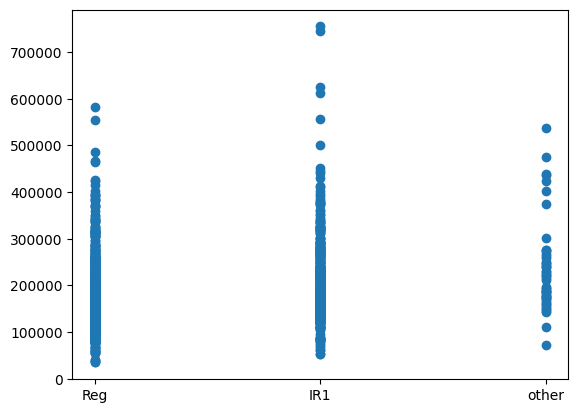

LotShape
Reg      925
IR1      484
other     51
Name: count, dtype: int64

In [9]:
a = train['LotShape']
b = train['SalePrice']
plt.scatter(a,b)
plt.show()

train[['LotShape','SalePrice']].groupby('LotShape',as_index = False).mean().sort_values(by = 'SalePrice', ascending = False)\

train['LotShape'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

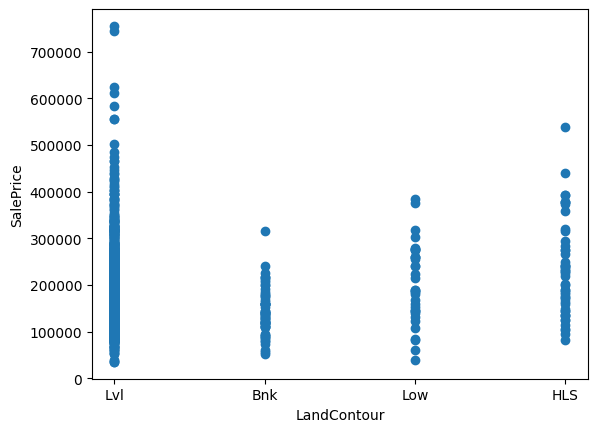

In [10]:
a = train['LandContour']
b = train['SalePrice']
plt.xlabel('LandContour')
plt.ylabel('SalePrice')
plt.scatter(a,b)
plt.show

train[['LandContour','SalePrice']].groupby('LandContour',as_index = False).mean().sort_values(by = 'SalePrice', ascending = False) 

train['LandContour'].value_counts()

,Utilities,SalePrice
0,AllPub,180950.95682
1,NoSeWa,137500.00000


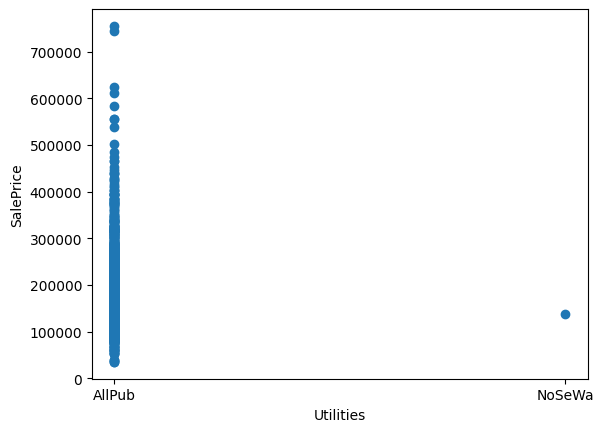

In [11]:
a = train['Utilities']
b = train['SalePrice']
plt.xlabel('Utilities')
plt.ylabel('SalePrice')
plt.scatter(a,b)
plt.show

train[['Utilities','SalePrice']].groupby('Utilities',as_index = False).mean().sort_values(by = 'SalePrice', ascending = False)

In [12]:
counts = train['LotConfig'].value_counts()
rare = counts[counts<50].index
train['LotConfig'] = train['LotConfig'].replace(list(rare) , 'other')

LotConfig
Inside     1052
Corner      263
CulDSac      94
other        51
Name: count, dtype: int64

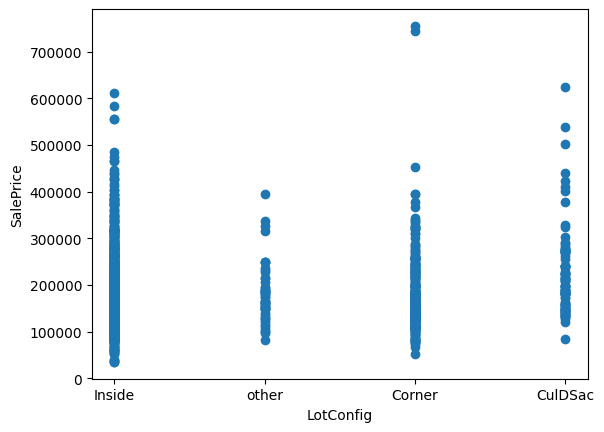

In [13]:
a = train['LotConfig']
b = train['SalePrice']
plt.xlabel('LotConfig')
plt.ylabel('SalePrice')
plt.scatter(a,b)
plt.show

train['LotConfig'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


,LandSlope,SalePrice
2,Sev,204379.230769
1,Mod,196734.138462
0,Gtl,179956.799566


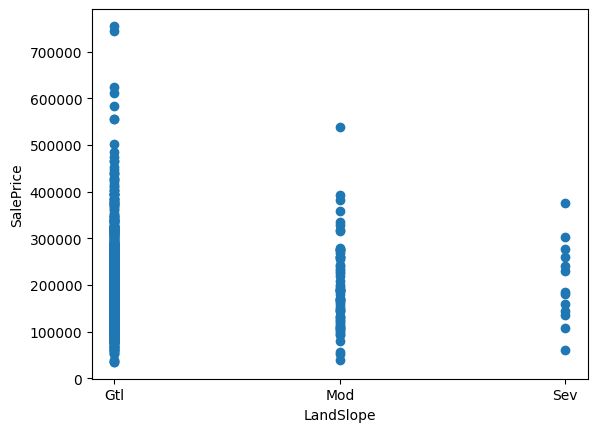

In [14]:
a = train['LandSlope']
b = train['SalePrice']
plt.xlabel('LandSlope')
plt.ylabel('SalePrice')
plt.scatter(a,b)
plt.show

print(train['LandSlope'].value_counts())

train[['LandSlope','SalePrice']].groupby('LandSlope', as_index = False).mean().sort_values(by = 'SalePrice' , ascending = False)

In [15]:
counts = train['Neighborhood'].value_counts()
rare = counts[counts<50].index
train['Neighborhood'] = train['Neighborhood'].replace(list(rare),'other')

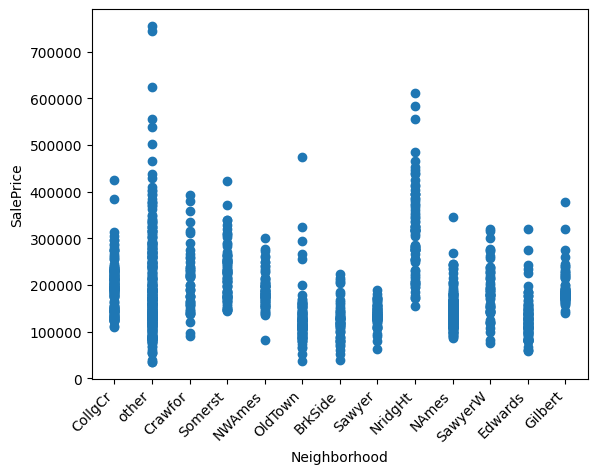

<Figure size 1200x600 with 0 Axes>

Neighborhood
other      315
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Name: count, dtype: int64

In [16]:
a = train['Neighborhood']
b = train['SalePrice']
plt.xlabel('Neighborhood')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('SalePrice')
plt.scatter(a,b)
plt.figure(figsize=(12,6))
plt.show()

train['Neighborhood'].value_counts()


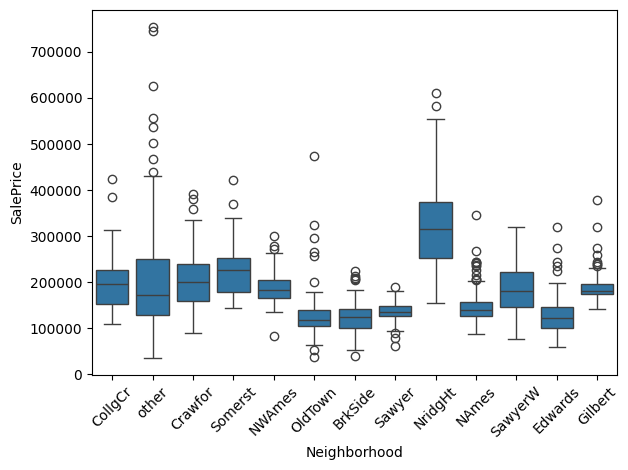

In [17]:
sns.boxplot(x ='Neighborhood' , y ='SalePrice', data = train )
plt.xticks(rotation = 45 )
plt.tight_layout()
plt.show()

In [18]:
counts = train['Condition1'].value_counts()
rare = counts[counts < 15 ].index
train['Condition1'] = train['Condition1'].replace(list(rare) , 'other')

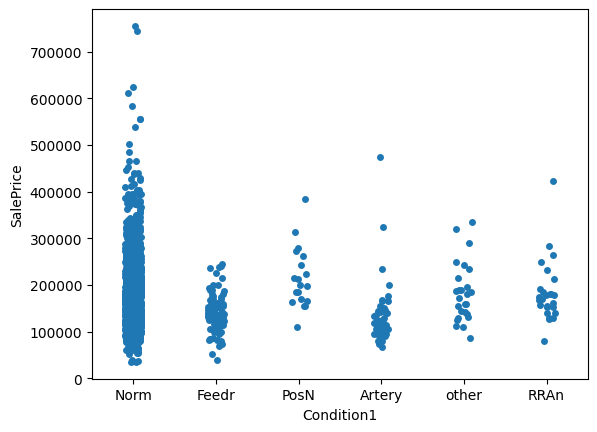

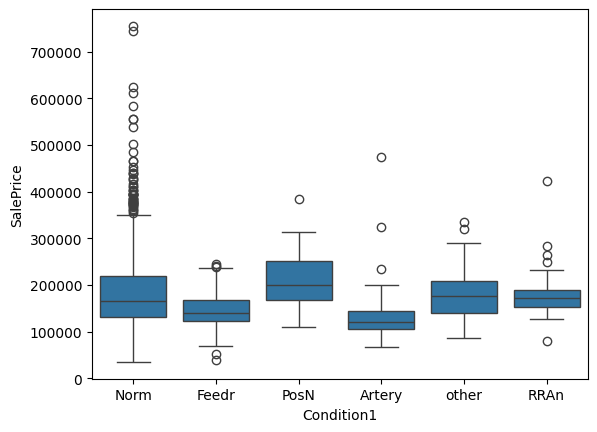

Condition1
Norm      1260
Feedr       81
Artery      48
other       26
RRAn        26
PosN        19
Name: count, dtype: int64

In [19]:
sns.stripplot(x = 'Condition1', y= 'SalePrice' , data = train)
plt.show()

sns.boxplot(x = 'Condition1', y = 'SalePrice', data = train)
plt.show()

train['Condition1'].value_counts()

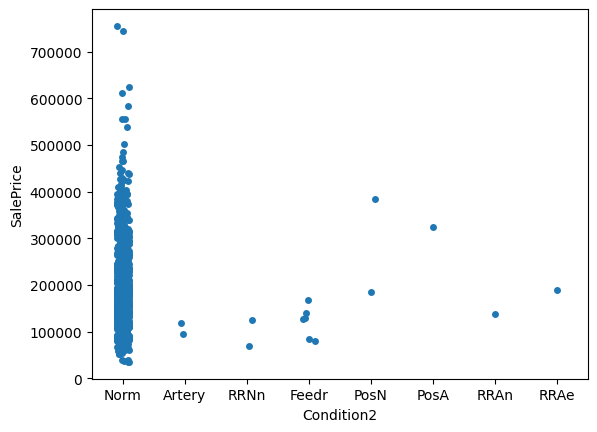

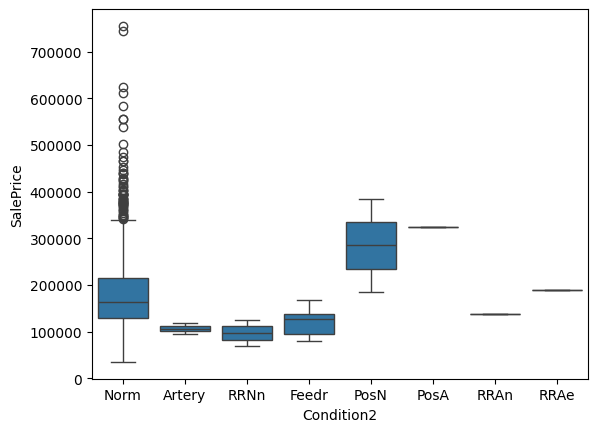

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [20]:
sns.stripplot(x = 'Condition2', y= 'SalePrice' , data = train)
plt.show()

sns.boxplot(x = 'Condition2', y = 'SalePrice', data = train)
plt.show()

train['Condition2'].value_counts()

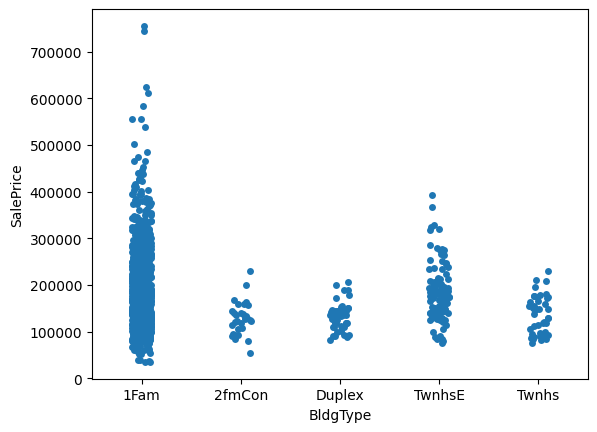

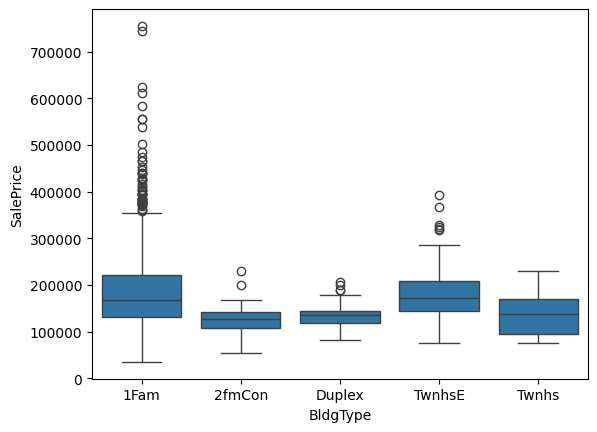

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [21]:
sns.stripplot(x = 'BldgType', y= 'SalePrice' , data = train)
plt.show()

sns.boxplot(x = 'BldgType', y = 'SalePrice', data = train)
plt.show()

train['BldgType'].value_counts()

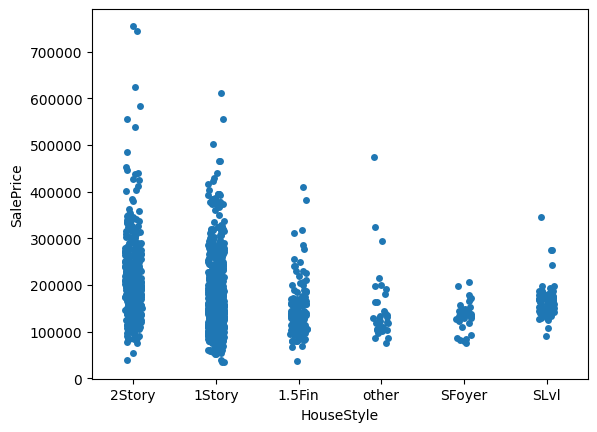

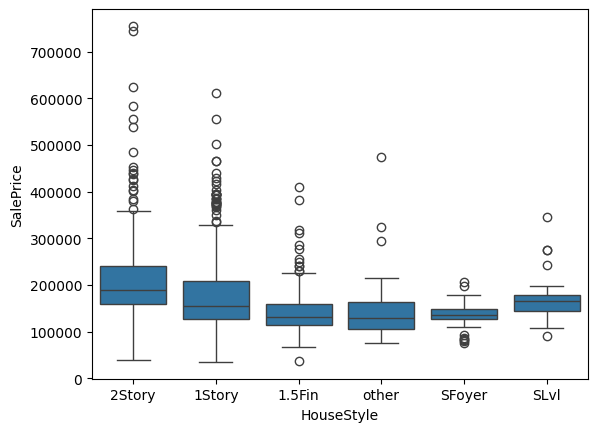

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
other      33
Name: count, dtype: int64

In [22]:
counts = train['HouseStyle'].value_counts()
rare = counts[counts < 20 ].index
train['HouseStyle'] = train['HouseStyle'].replace(list(rare), 'other')

sns.stripplot(x = 'HouseStyle', y= 'SalePrice' , data = train)
plt.show()

sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train)
plt.show()

train['HouseStyle'].value_counts()

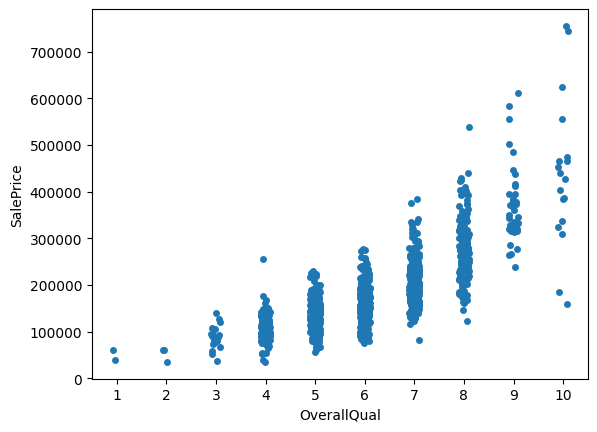

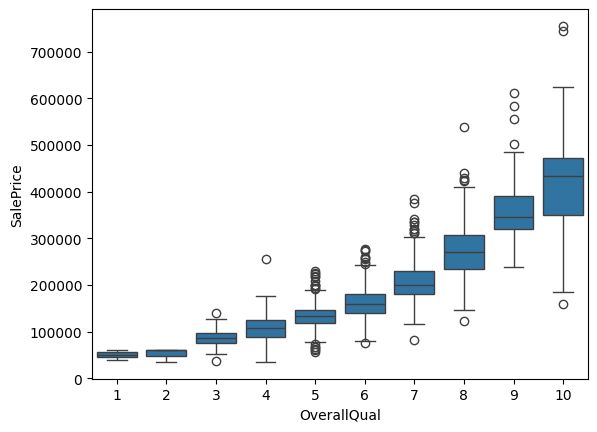

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [23]:
sns.stripplot(x = 'OverallQual', y= 'SalePrice' , data = train)
plt.show()

sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train)
plt.show()

train['OverallQual'].value_counts()

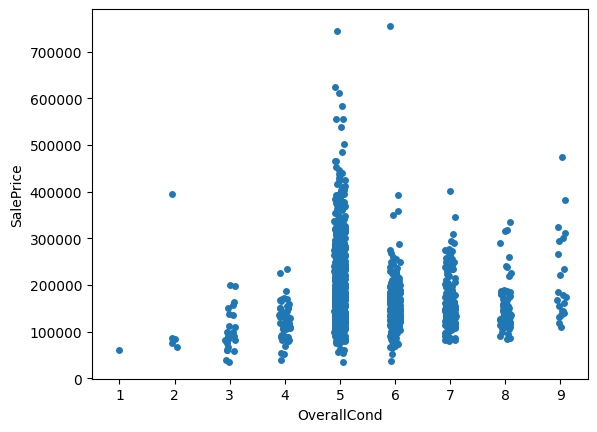

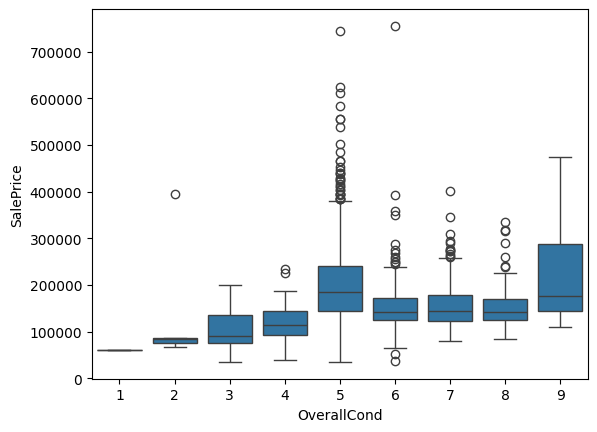

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [24]:
sns.stripplot(x = 'OverallCond', y= 'SalePrice' , data = train)
plt.show()

sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = train)
plt.show()

train['OverallCond'].value_counts()

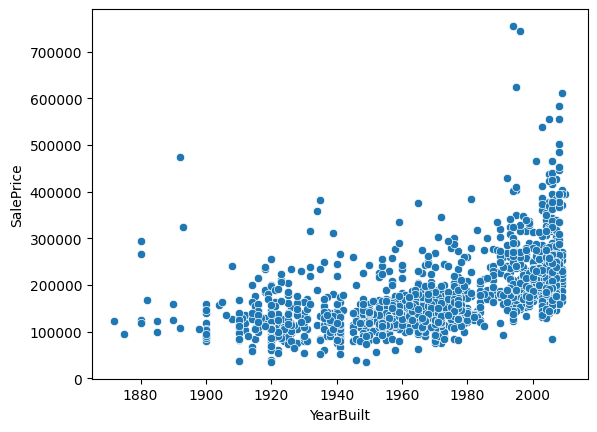

In [25]:
sns.scatterplot(x = 'YearBuilt', y= 'SalePrice' , data = train)
plt.show()

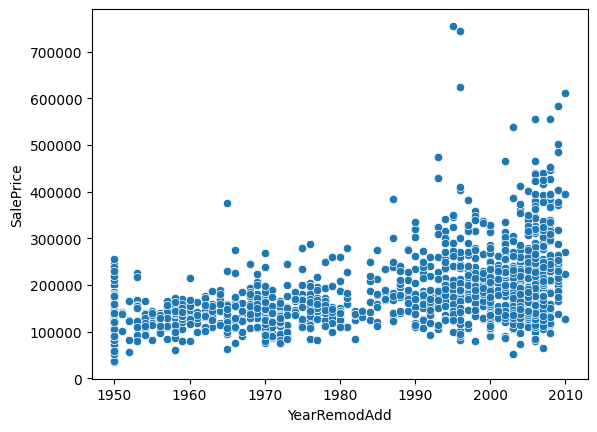

In [26]:
sns.scatterplot(x = 'YearRemodAdd', y= 'SalePrice' , data = train)
plt.show()

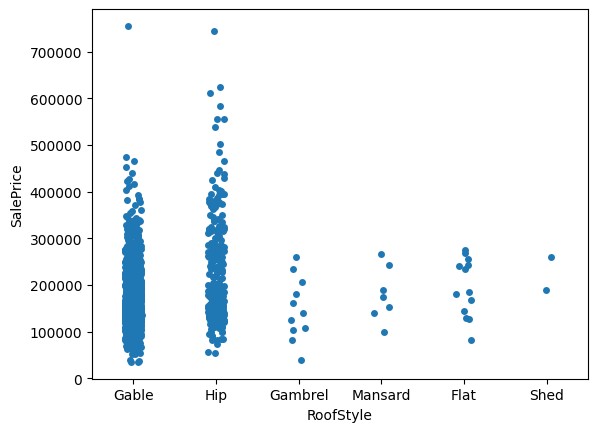

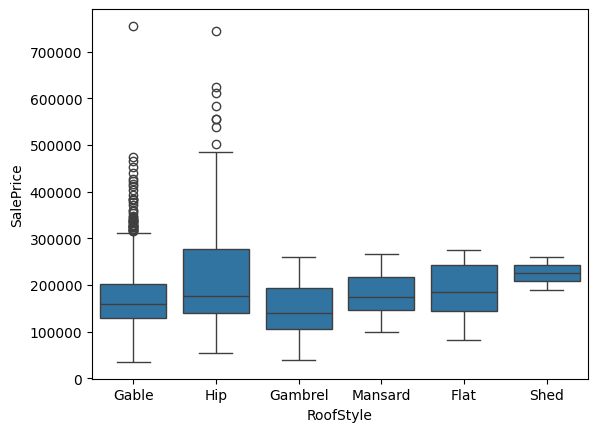

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [27]:
sns.stripplot(x = 'RoofStyle', y= 'SalePrice' , data = train)
plt.show()

sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = train)
plt.show()

train['RoofStyle'].value_counts()

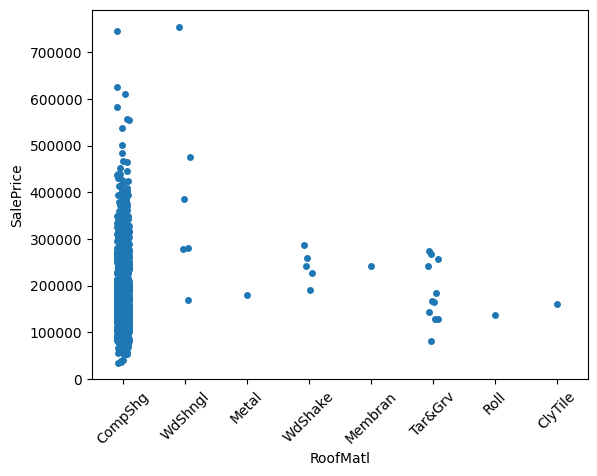

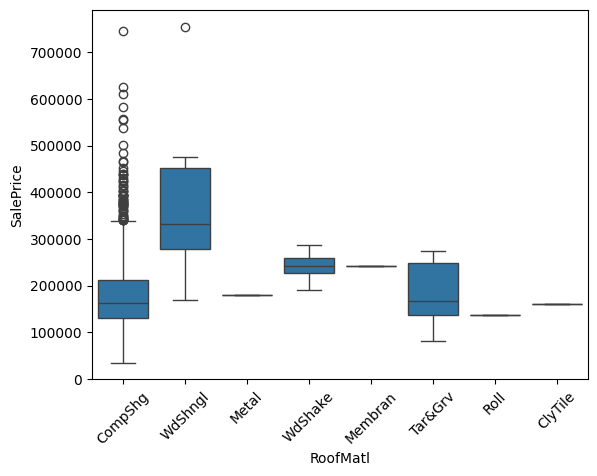

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [28]:
sns.stripplot(x = 'RoofMatl', y= 'SalePrice' , data = train)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = train)
plt.xticks(rotation = 45)
plt.show()

train['RoofMatl'].value_counts()

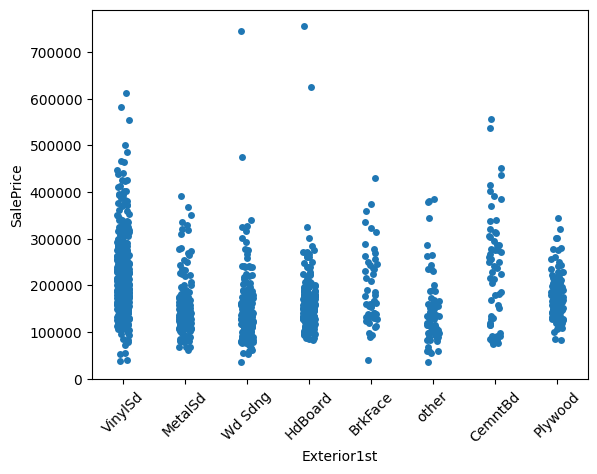

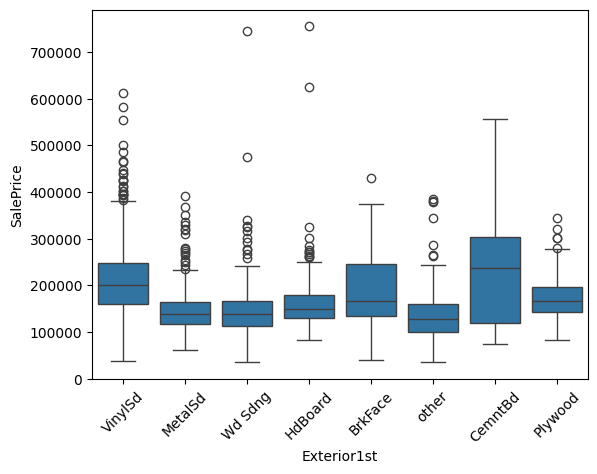

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
other       78
CemntBd     61
BrkFace     50
Name: count, dtype: int64

In [29]:
counts = train['Exterior1st'].value_counts()
rare = counts[counts<30].index
train['Exterior1st'] = train['Exterior1st'].replace(list(rare),'other')

sns.stripplot(x = 'Exterior1st', y= 'SalePrice' , data = train)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = train)
plt.xticks(rotation = 45)
plt.show()

train['Exterior1st'].value_counts()

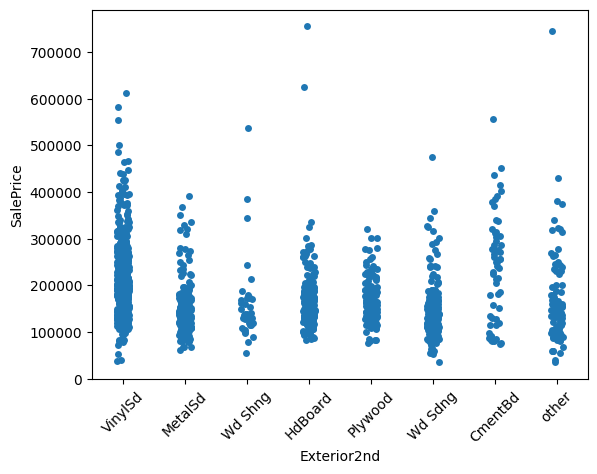

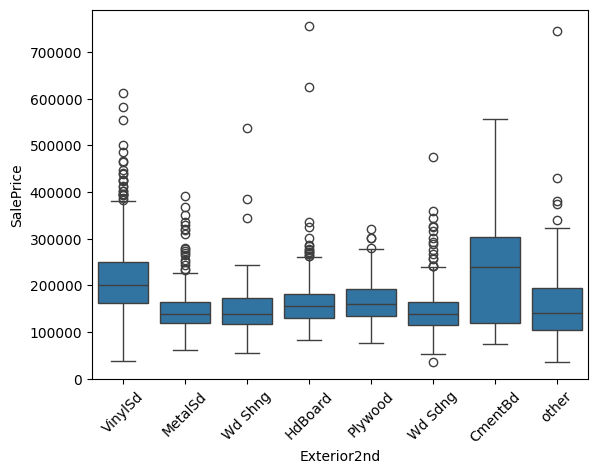

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
other       98
CmentBd     60
Wd Shng     38
Name: count, dtype: int64

In [30]:
counts = train['Exterior2nd'].value_counts()
rare = counts[counts<30].index
train['Exterior2nd'] = train['Exterior2nd'].replace(list(rare),'other')

sns.stripplot(x = 'Exterior2nd', y= 'SalePrice' , data = train)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = train)
plt.xticks(rotation = 45)
plt.show()

train['Exterior2nd'].value_counts()

C:\Users\Pratham\AppData\Local\Temp\ipykernel_21700\310150094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MasVnrType'].fillna('None' , inplace = True)


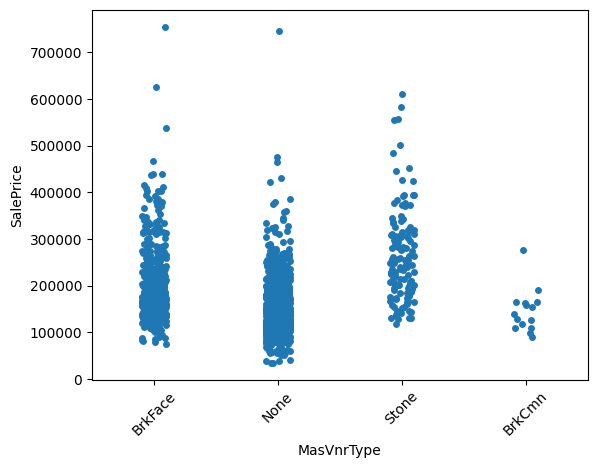

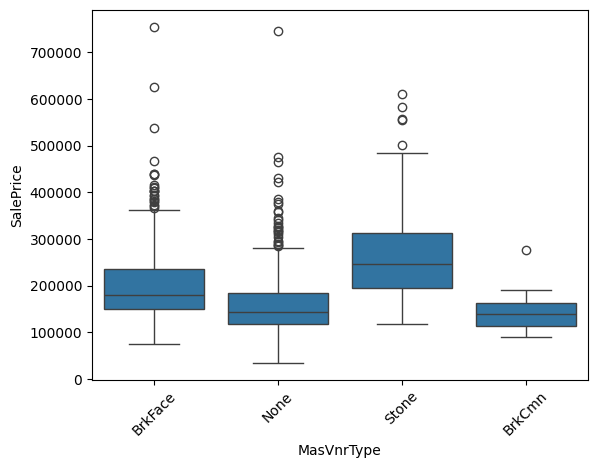

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [31]:
train['MasVnrType'].fillna('None' , inplace = True)

sns.stripplot(x = 'MasVnrType', y= 'SalePrice' , data = train)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = train)
plt.xticks(rotation = 45)
plt.show()

train['MasVnrType'].value_counts()

--- Analyzing Feature: CentralAir ---


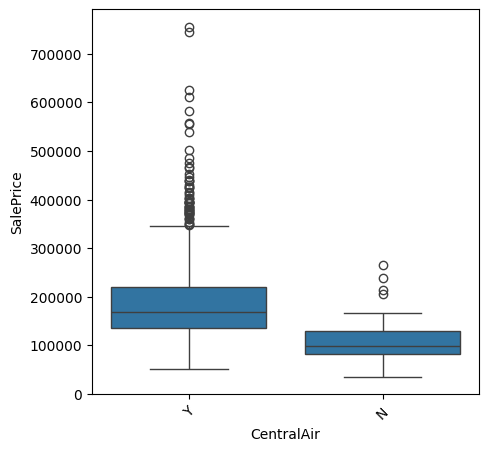

CentralAir
Y    1365
N      95
Name: count, dtype: int64


--- Analyzing Feature: Electrical ---


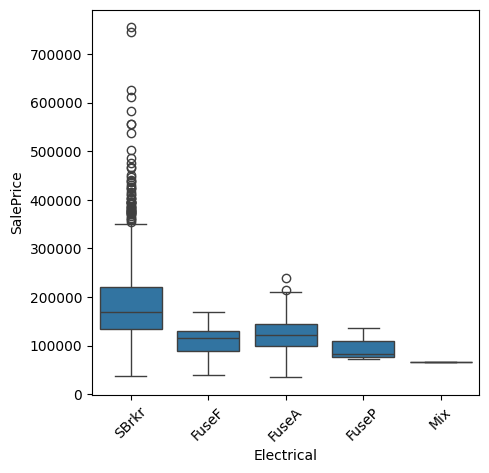

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


--- Analyzing Feature: KitchenQual ---


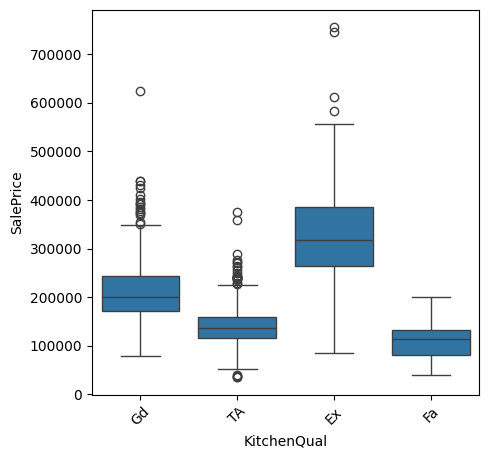

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


--- Analyzing Feature: Functional ---


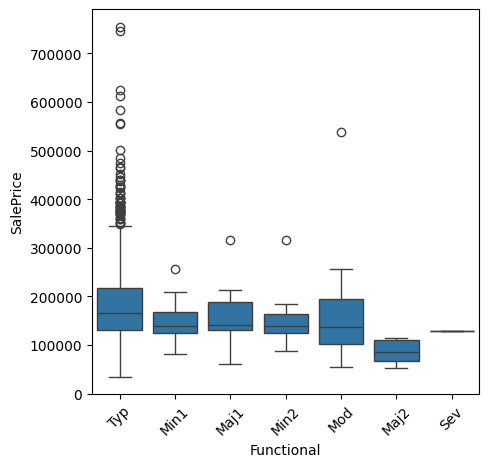

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64


--- Analyzing Feature: FireplaceQu ---


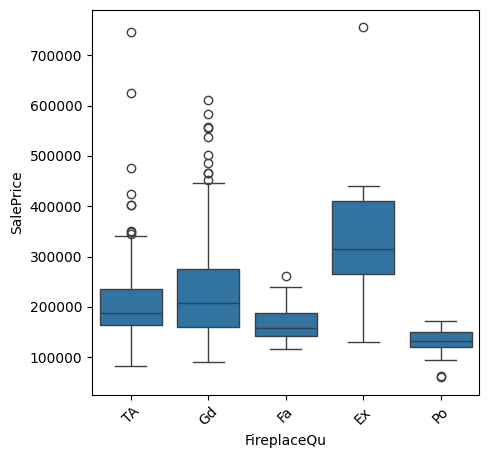

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


--- Analyzing Feature: GarageType ---


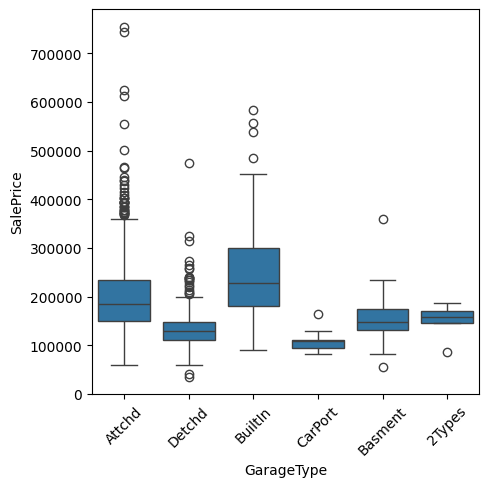

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


--- Analyzing Feature: GarageFinish ---


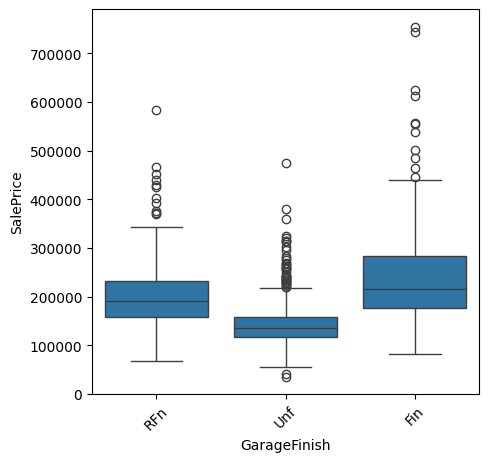

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64


--- Analyzing Feature: GarageQual ---


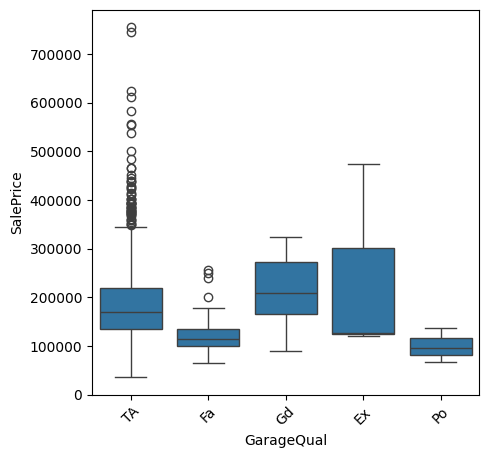

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64


--- Analyzing Feature: GarageCond ---


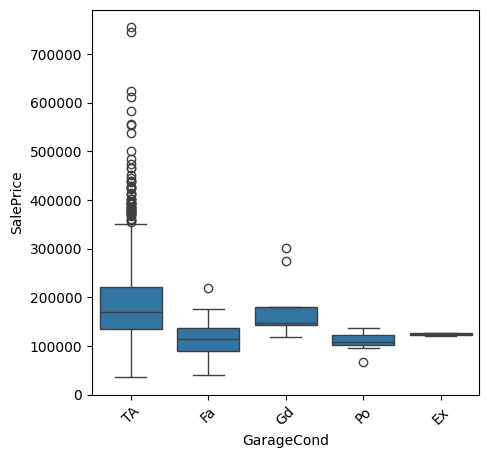

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


--- Analyzing Feature: PavedDrive ---


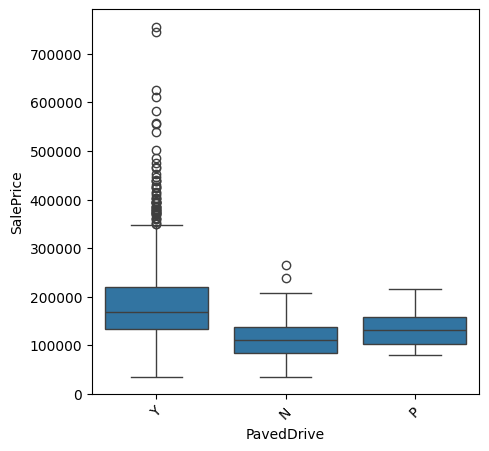

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64


--- Analyzing Feature: PoolQC ---


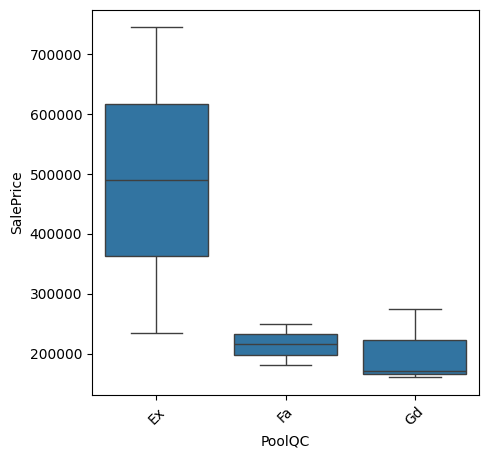

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64


--- Analyzing Feature: Fence ---


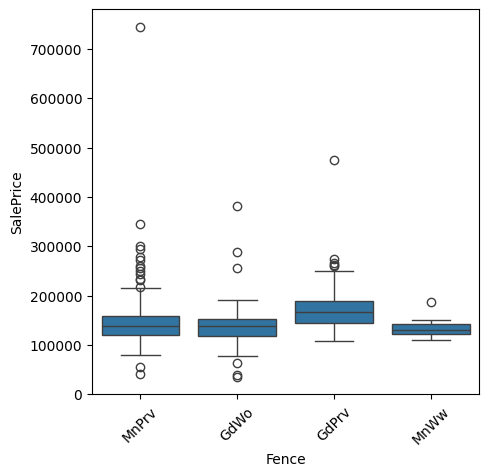

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64


--- Analyzing Feature: MiscFeature ---


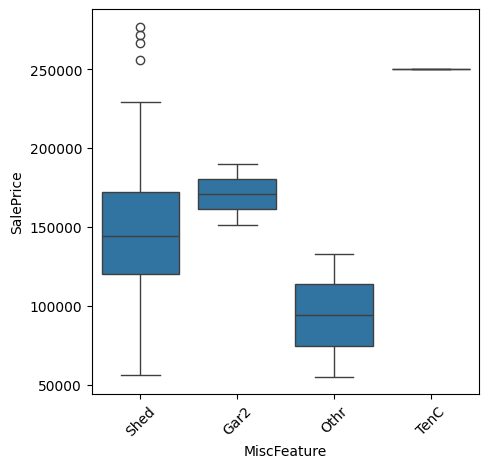

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64


--- Analyzing Feature: SaleType ---


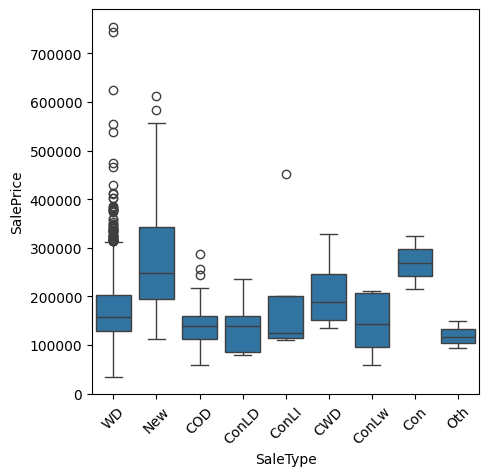

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64


--- Analyzing Feature: SaleCondition ---


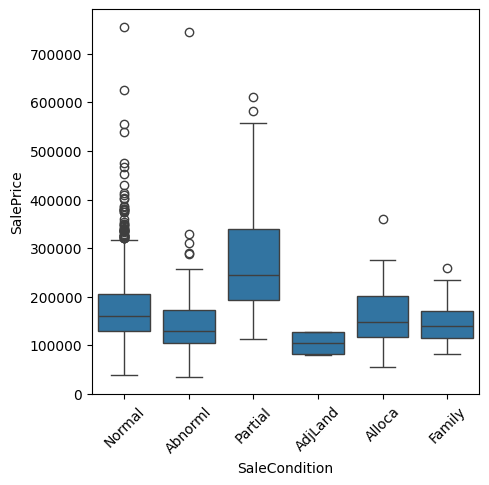

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64




In [32]:

categorical_features=['CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

for feature in categorical_features:
    print(f"--- Analyzing Feature: {feature} ---")
    
    plt.figure(figsize=(5,5))
    sns.boxplot(x=feature, y='SalePrice', data=train) 
    
    plt.xticks(rotation=45)
    plt.show()
    print(train[feature].value_counts())
    print("\n" + "="*50 + "\n")

In [33]:
features = ['Foundation','GarageType','SaleCondition']
for x in features:
    counts = train[x].value_counts()
    rare = counts[counts<40].index
    train[x] = train[x].replace(list(rare),'other')

In [34]:
train['GarageFinish'].fillna('None' , inplace = True)

C:\Users\Pratham\AppData\Local\Temp\ipykernel_21700\4046257217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['GarageFinish'].fillna('None' , inplace = True)


In [35]:
train['GarageFinish'].value_counts()

GarageFinish
Unf     605
RFn     422
Fin     352
None     81
Name: count, dtype: int64

In [36]:
train.select_dtypes(include=['int']).columns


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

--- Analyzing Feature: OverallQual ---


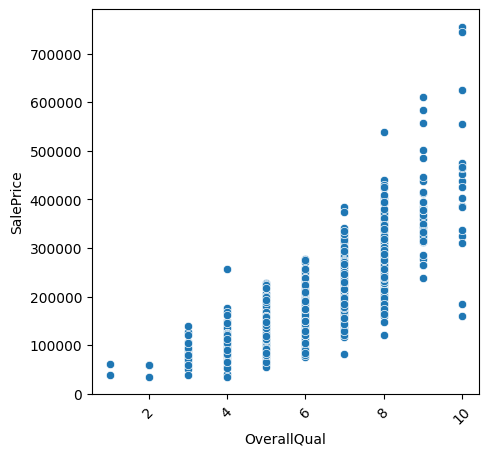

1460


--- Analyzing Feature: OverallCond ---


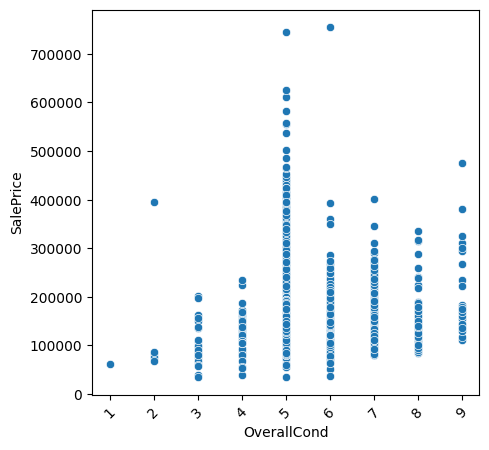

1460


--- Analyzing Feature: YearBuilt ---


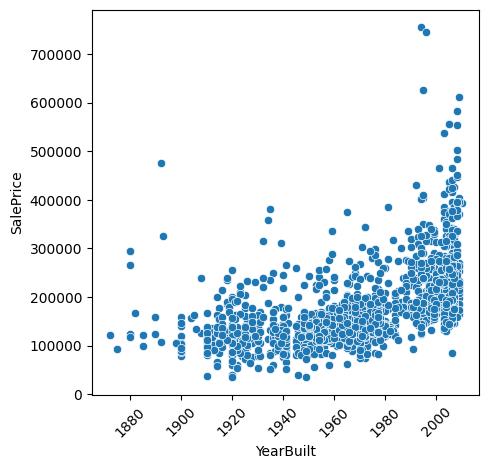

1460


--- Analyzing Feature: YearRemodAdd ---


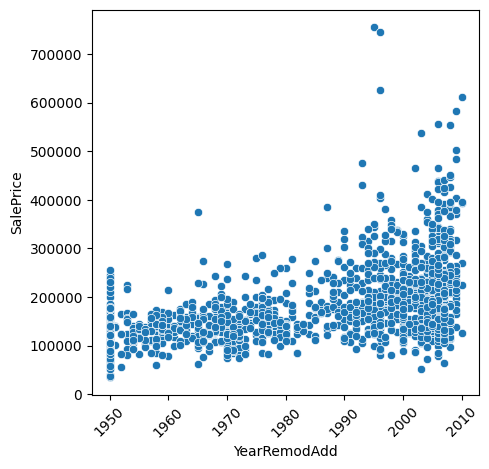

1460


--- Analyzing Feature: BsmtFinSF1 ---


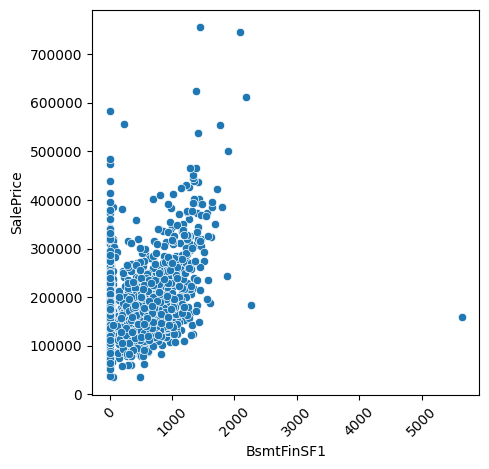

1460


--- Analyzing Feature: BsmtFinSF2 ---


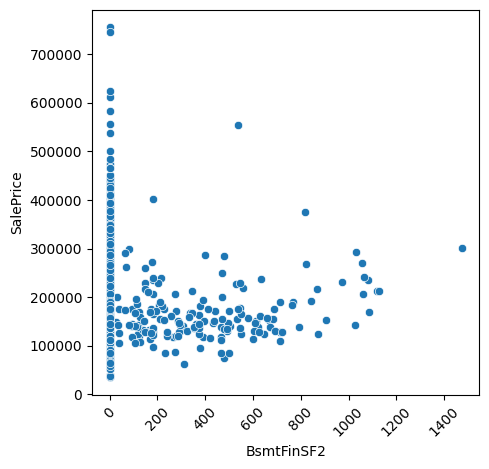

1460


--- Analyzing Feature: BsmtUnfSF ---


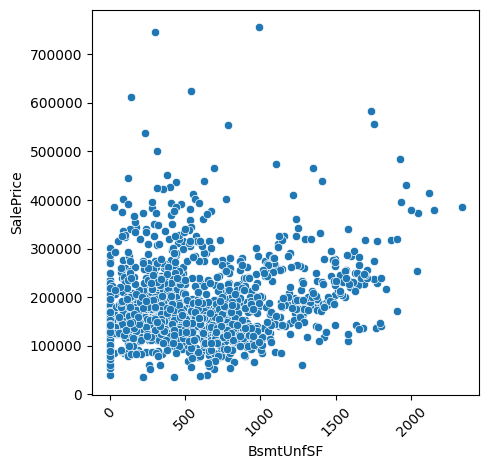

1460


--- Analyzing Feature: TotalBsmtSF ---


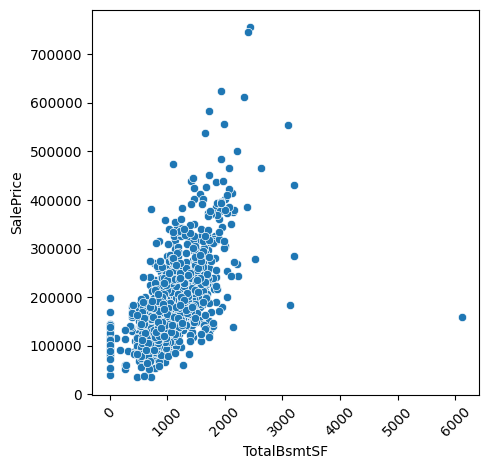

1460


--- Analyzing Feature: 1stFlrSF ---


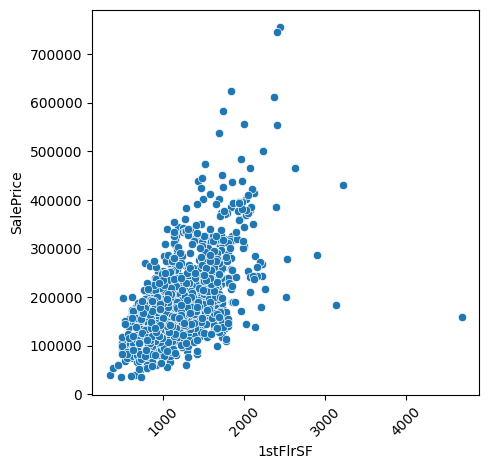

1460


--- Analyzing Feature: 2ndFlrSF ---


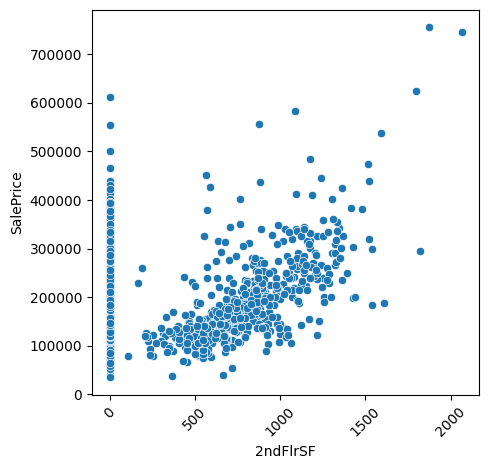

1460


--- Analyzing Feature: LowQualFinSF ---


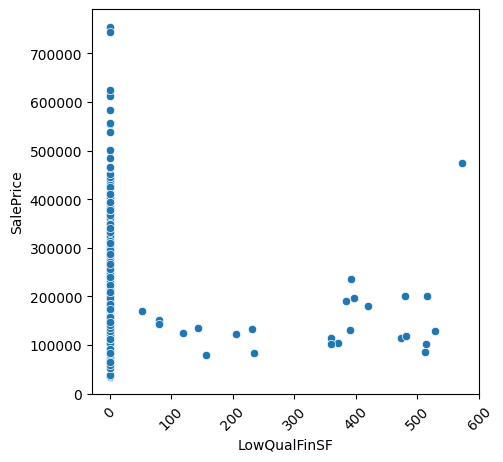

1460


--- Analyzing Feature: GrLivArea ---


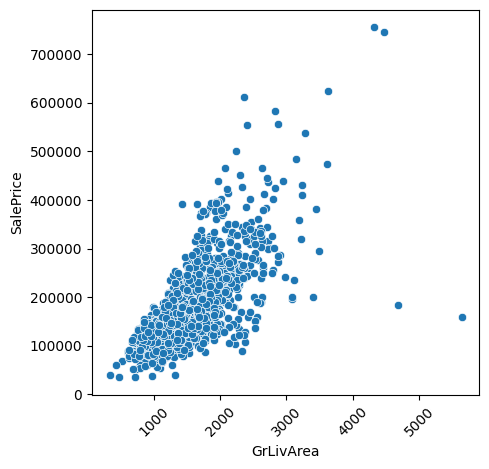

1460


--- Analyzing Feature: BsmtFullBath ---


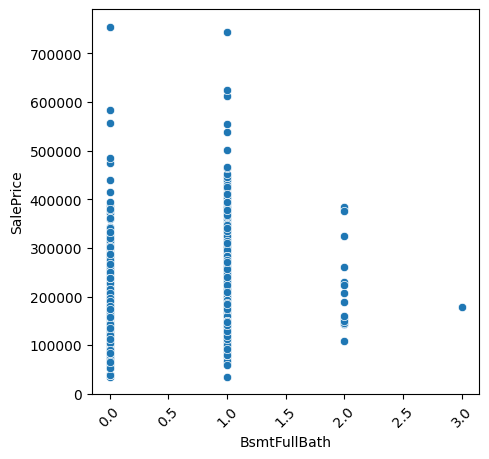

1460


--- Analyzing Feature: BsmtHalfBath ---


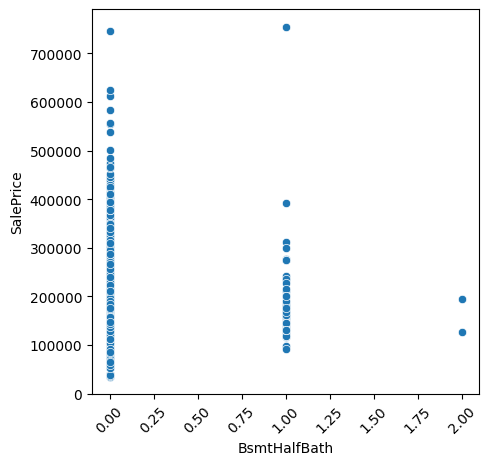

1460


--- Analyzing Feature: FullBath ---


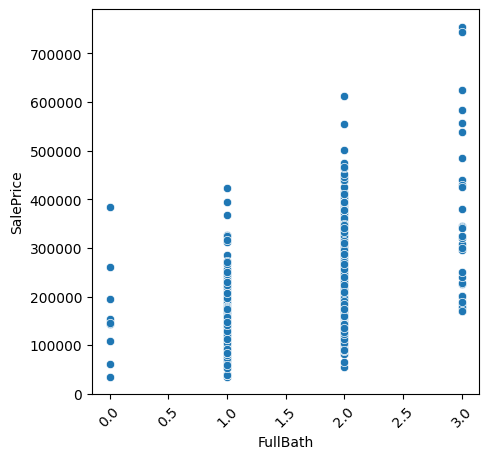

1460


--- Analyzing Feature: HalfBath ---


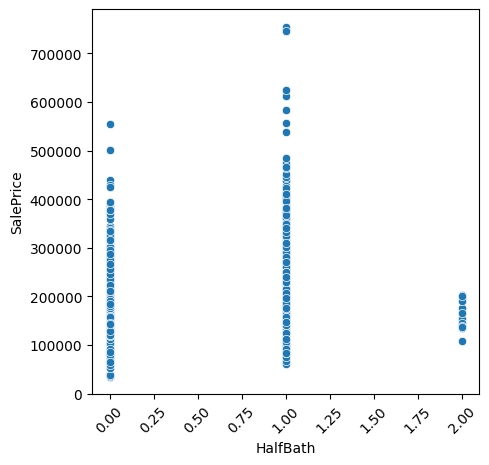

1460


--- Analyzing Feature: BedroomAbvGr ---


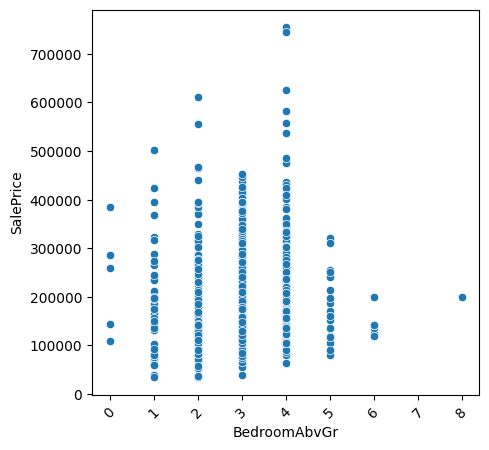

1460


--- Analyzing Feature: KitchenAbvGr ---


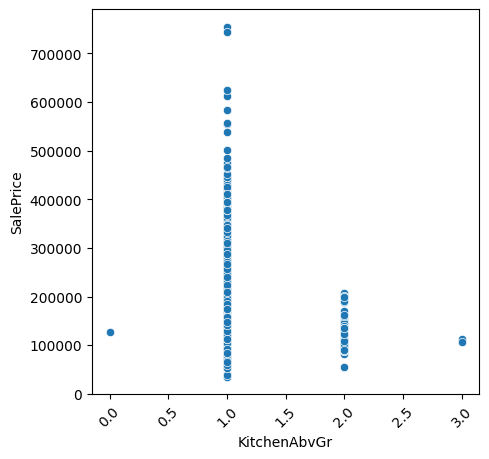

1460


--- Analyzing Feature: TotRmsAbvGrd ---


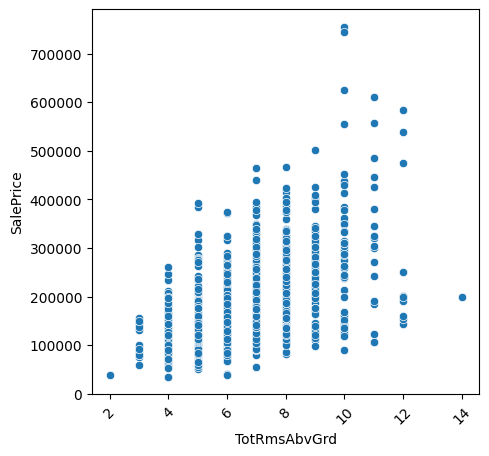

1460


--- Analyzing Feature: Fireplaces ---


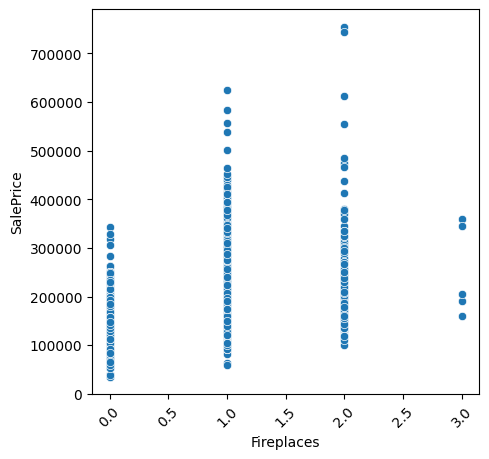

1460


--- Analyzing Feature: GarageCars ---


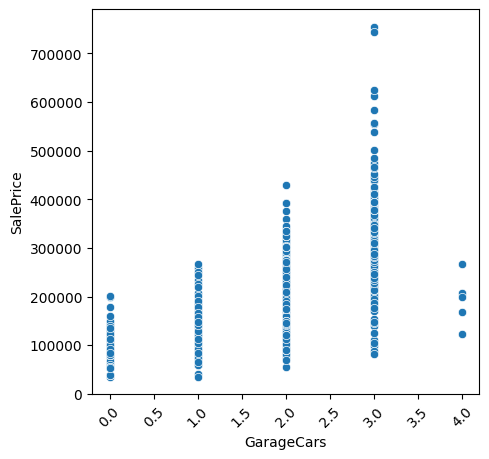

1460


--- Analyzing Feature: GarageArea ---


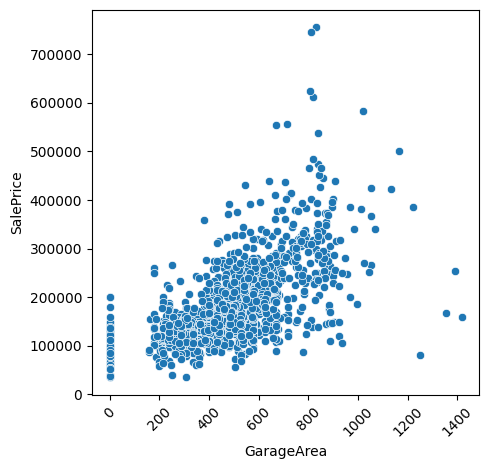

1460


--- Analyzing Feature: WoodDeckSF ---


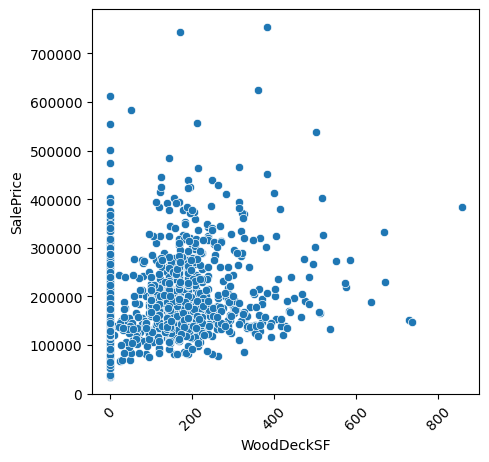

1460


--- Analyzing Feature: OpenPorchSF ---


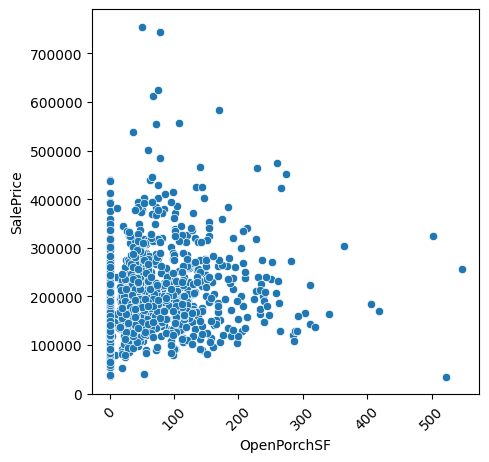

1460


--- Analyzing Feature: EnclosedPorch ---


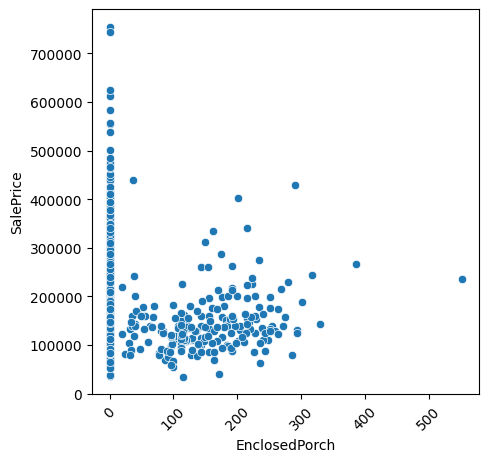

1460


--- Analyzing Feature: 3SsnPorch ---


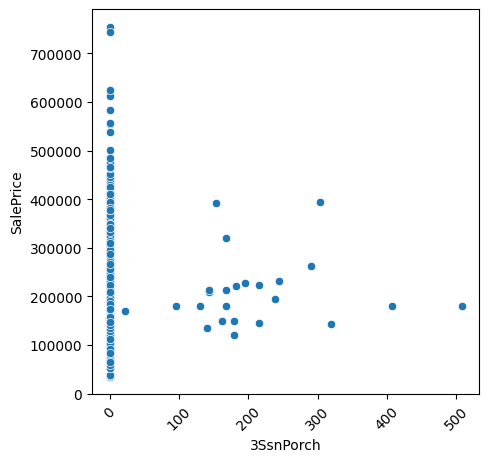

1460


--- Analyzing Feature: ScreenPorch ---


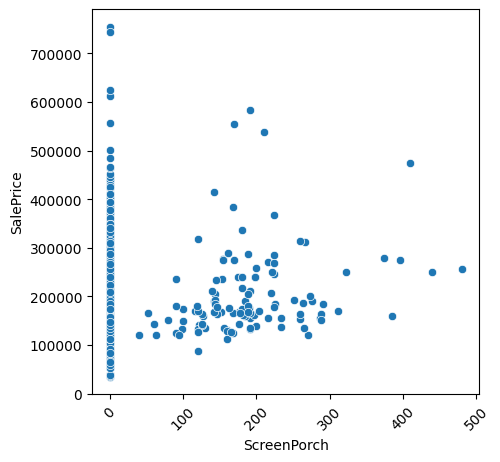

1460


--- Analyzing Feature: PoolArea ---


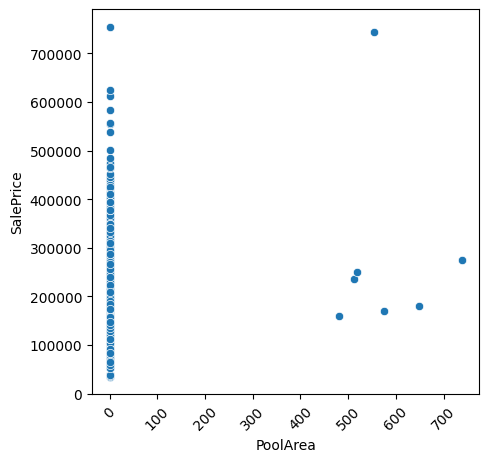

1460


--- Analyzing Feature: MiscVal ---


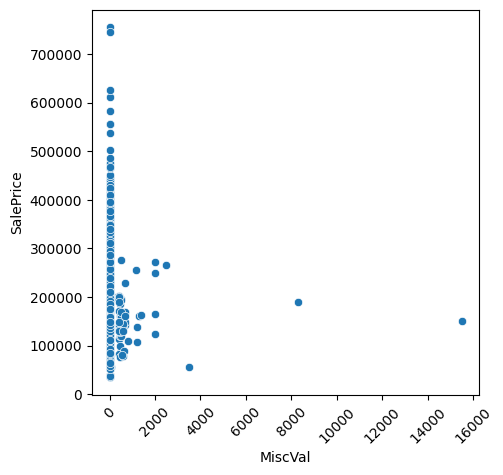

1460


--- Analyzing Feature: MoSold ---


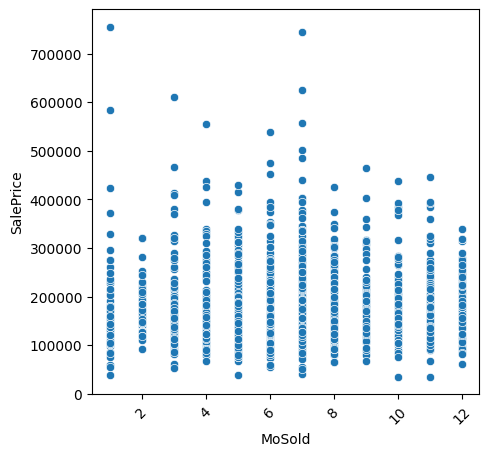

1460


--- Analyzing Feature: YrSold ---


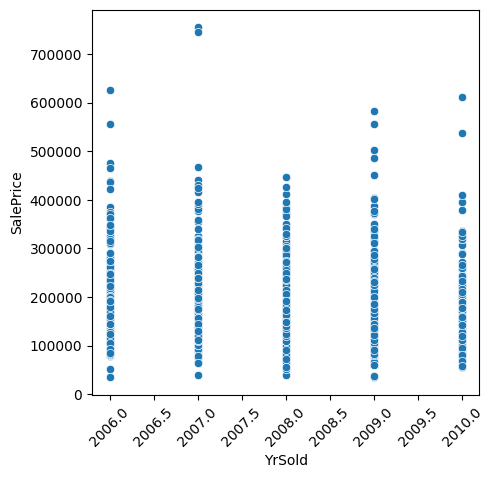

1460




In [37]:
Features  = ['OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
for a in Features:
    print(f"--- Analyzing Feature: {a} ---")
    
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=a, y='SalePrice', data=train) 
    
    plt.xticks(rotation=45)
    plt.show()
    print(train[a].count())
    print("\n" + "="*50 + "\n")

In [38]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


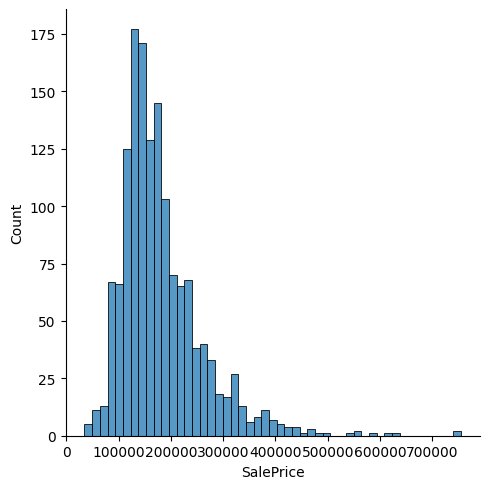

In [39]:
sns.displot(train['SalePrice']);

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [40]:
train_acc = train[['MSZoning','LotFrontage','LotArea','LotShape','LandContour','LandSlope','Neighborhood','Condition1'
                  ,'BldgType','HouseStyle','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','ExterQual','SaleCondition','BsmtFinSF1',
                  '1stFlrSF','GrLivArea','GarageArea','SalePrice']]
train_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LandSlope      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  Exterior1st    1460 non-null   object 
 14  ExterQual      1460 non-null   object 
 15  SaleCondition  1460 non-null   object 
 16  BsmtFinSF1     1460 non-null   int64  
 17  1stFlrSF       1460 non-null   int64  
 18  GrLivAre

C:\Users\Pratham\AppData\Local\Temp\ipykernel_21700\3134870868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_acc['LotFrontage'] = train_acc['LotFrontage'].fillna(median)


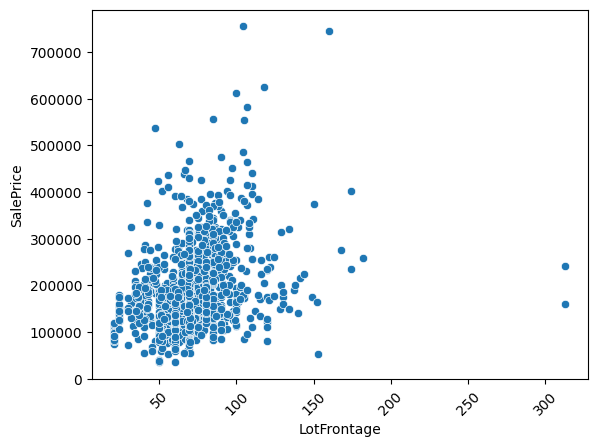

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LandSlope      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  Exterior1st    1460 non-null   object 
 14  ExterQual      1460 non-null   object 
 15  SaleCondition  1460 non-null   object 
 16  BsmtFinSF1     1460 non-null   int64  
 17  1stFlrSF       1460 non-null   int64  
 18  GrLivAre

In [41]:
median = train_acc['LotFrontage'].median()
train_acc['LotFrontage'] = train_acc['LotFrontage'].fillna(median)

sns.scatterplot(x = 'LotFrontage', y= 'SalePrice' , data = train_acc)
plt.xticks(rotation = 45)
plt.show()

train_acc.info()

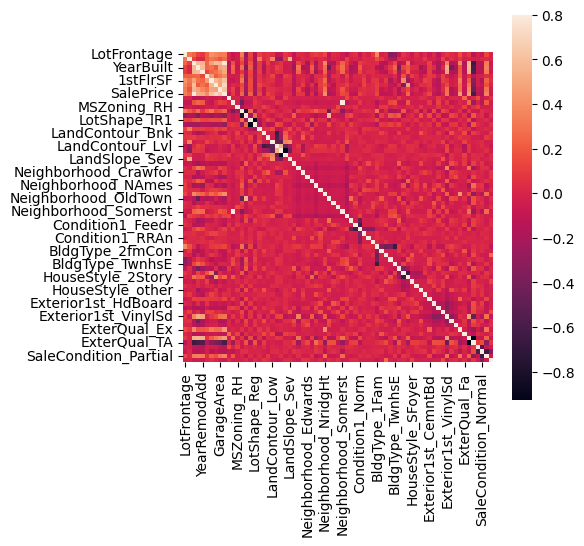

In [42]:
matrix = pd.get_dummies(train_acc)
cormat = matrix.corr()
f , ax = plt.subplots(figsize = (5,5))
sns.heatmap(cormat , vmax=0.8, square=True)
plt.show()

In [43]:
rrmat = matrix.corr()

# 2. Instead of plotting the whole thing, just pull out the 'SalePrice' column
saleprice_correlations = cormat['SalePrice']

# 3. Sort it to see the strongest relationships at the top
sorted_correlations = saleprice_correlations.sort_values(ascending=False)

# 4. Print the top 20 most important features. This is your answer.
print("--- Top Features Correlated with SalePrice ---")
print(sorted_correlations.head(20))

--- Top Features Correlated with SalePrice ---
SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageArea               0.623431
1stFlrSF                 0.605852
YearBuilt                0.522897
YearRemodAdd             0.507101
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleCondition_Partial    0.352060
LotFrontage              0.334771
Exterior1st_VinylSd      0.305009
LotArea                  0.263843
MSZoning_RL              0.245063
HouseStyle_2Story        0.242880
LotShape_IR1             0.223284
Neighborhood_Somerst     0.140058
BldgType_1Fam            0.137483
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

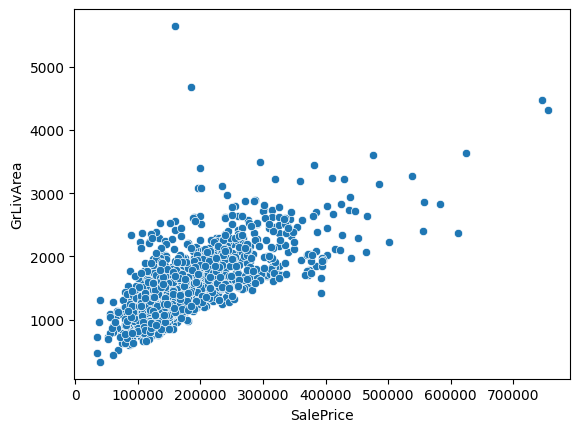

In [44]:
sns.scatterplot(x = 'SalePrice' , y= 'GrLivArea' , data = train_acc)

In [45]:
test = test[['MSZoning','LotFrontage','LotArea','LotShape','LandContour','LandSlope','Neighborhood','Condition1'
                  ,'BldgType','HouseStyle','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','ExterQual','SaleCondition','BsmtFinSF1',
                  '1stFlrSF','GrLivArea','GarageArea']]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   LotFrontage    1232 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   LandSlope      1459 non-null   object 
 6   Neighborhood   1459 non-null   object 
 7   Condition1     1459 non-null   object 
 8   BldgType       1459 non-null   object 
 9   HouseStyle     1459 non-null   object 
 10  OverallQual    1459 non-null   int64  
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  Exterior1st    1458 non-null   object 
 14  ExterQual      1459 non-null   object 
 15  SaleCondition  1459 non-null   object 
 16  BsmtFinSF1     1458 non-null   float64
 17  1stFlrSF       1459 non-null   int64  
 18  GrLivAre

In [46]:
counts = test['LotShape'].value_counts()
rare = counts[counts<40].index
test['LotShape'] = test['LotShape'].replace(list(rare),"other")

counts = test['Neighborhood'].value_counts()
rare = counts[counts<50].index
test['Neighborhood'] = test['Neighborhood'].replace(list(rare),"other")

counts = test['Condition1'].value_counts()
rare = counts[counts<13].index
test['Condition1'] = test['Condition1'].replace(list(rare),"other")

counts = test['HouseStyle'].value_counts()
rare = counts[counts<15].index
test['HouseStyle'] = test['HouseStyle'].replace(list(rare),"other")

counts = test['Exterior1st'].value_counts()
rare = counts[counts<35].index
test['Exterior1st'] = test['Exterior1st'].replace(list(rare),"other")

counts = test['SaleCondition'].value_counts()
rare = counts[counts<35].index
test['SaleCondition'] = test['SaleCondition'].replace(list(rare),"other")

median = test['LotFrontage'].median()
test['LotFrontage'] = test['LotFrontage'].fillna(median)

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   LandSlope      1459 non-null   object 
 6   Neighborhood   1459 non-null   object 
 7   Condition1     1459 non-null   object 
 8   BldgType       1459 non-null   object 
 9   HouseStyle     1459 non-null   object 
 10  OverallQual    1459 non-null   int64  
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  Exterior1st    1458 non-null   object 
 14  ExterQual      1459 non-null   object 
 15  SaleCondition  1459 non-null   object 
 16  BsmtFinSF1     1458 non-null   float64
 17  1stFlrSF       1459 non-null   int64  
 18  GrLivAre

In [48]:
test.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 'ExterQual',
       'SaleCondition'],
      dtype='object')

In [49]:
import pandas as pd
train_dummies = pd.get_dummies(train_acc, columns=['MSZoning', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 'ExterQual',
       'SaleCondition'])
test_dummies = pd.get_dummies(test, columns=['MSZoning', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 'ExterQual',
       'SaleCondition'])
train_aligned, test_aligned = train_dummies.align(test_dummies, join='left', axis=1, fill_value=0)

In [50]:
train_aligned.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,1stFlrSF,GrLivArea,GarageArea,SalePrice,...,Exterior1st_Wd Sdng,Exterior1st_other,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_other
0,65.0,8450,7,2003,2003,706,856,1710,548,208500,...,False,False,False,False,True,False,False,True,False,False
1,80.0,9600,6,1976,1976,978,1262,1262,460,181500,...,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,7,2001,2002,486,920,1786,608,223500,...,False,False,False,False,True,False,False,True,False,False
3,60.0,9550,7,1915,1970,216,961,1717,642,140000,...,True,False,False,False,False,True,True,False,False,False
4,84.0,14260,8,2000,2000,655,1145,2198,836,250000,...,False,False,False,False,True,False,False,True,False,False


In [51]:
test_aligned.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,1stFlrSF,GrLivArea,GarageArea,SalePrice,...,Exterior1st_Wd Sdng,Exterior1st_other,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_other
0,80.0,11622,5,1961,1961,468.0,896,896,730.0,0,...,False,False,False,False,False,True,False,True,False,False
1,81.0,14267,6,1958,1958,923.0,1329,1329,312.0,0,...,True,False,False,False,False,True,False,True,False,False
2,74.0,13830,5,1997,1998,791.0,928,1629,482.0,0,...,False,False,False,False,False,True,False,True,False,False
3,78.0,9978,6,1998,1998,602.0,926,1604,470.0,0,...,False,False,False,False,False,True,False,True,False,False
4,43.0,5005,8,1992,1992,263.0,1280,1280,506.0,0,...,False,False,False,False,True,False,False,True,False,False


In [52]:
median_bsmt = test_aligned['BsmtFinSF1'].median()
test_aligned['BsmtFinSF1'] = test_aligned['BsmtFinSF1'].fillna(median_bsmt)

median_Area = test_aligned['GarageArea'].median()
test_aligned['GarageArea'] = test_aligned['GarageArea'].fillna(median_Area)

In [53]:
test_aligned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1459 non-null   float64
 1   LotArea                1459 non-null   int64  
 2   OverallQual            1459 non-null   int64  
 3   YearBuilt              1459 non-null   int64  
 4   YearRemodAdd           1459 non-null   int64  
 5   BsmtFinSF1             1459 non-null   float64
 6   1stFlrSF               1459 non-null   int64  
 7   GrLivArea              1459 non-null   int64  
 8   GarageArea             1459 non-null   float64
 9   SalePrice              1459 non-null   int64  
 10  MSZoning_C (all)       1459 non-null   bool   
 11  MSZoning_FV            1459 non-null   bool   
 12  MSZoning_RH            1459 non-null   bool   
 13  MSZoning_RL            1459 non-null   bool   
 14  MSZoning_RM            1459 non-null   bool   
 15  LotS

In [54]:
from sklearn.linear_model import LinearRegression
lg  = LinearRegression()
x_train = train_aligned.drop('SalePrice',axis = 1)
y_train = train_aligned[['SalePrice']]
test_acc = test_aligned.drop('SalePrice',axis = 1)
lg.fit(x_train , y_train)
predict_lg = lg.predict(test_acc)
lg_log = round(lg.score(x_train,y_train)*100,2)
lg_log

84.31

In [57]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(x_train, y_train)
ridge_model_prediction = ridge_model.predict(test_acc)

In [65]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=1000, 
                             learning_rate=0.05,
                             random_state=42)
xgb_model.fit(x_train, y_train)
xgb_predit = xgb_model.predict(test_acc)

In [66]:
SalePrice = pd.DataFrame(xgb_predit , columns = ["SalePrice"])
sample = pd.read_csv("house_prices/sample_submission.csv")
sample = sample.drop(columns = ["SalePrice"])
spaceship = pd.concat([sample,SalePrice],axis =1)
spaceship.to_csv("xgb2",index = False )